In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import numpy as np


Importing the dataset into a variable df

In [2]:
df = pd.read_csv('/kaggle/input/flipkart-dataset/flipkart_com-ecommerce_sample.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


Information Regarding the Dataframe

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

Statistics about the 2 float columns

In [4]:
print(df.describe())

        retail_price  discounted_price
count   19922.000000      19922.000000
mean     2979.206104       1973.401767
std      9009.639341       7333.586040
min        35.000000         35.000000
25%       666.000000        350.000000
50%      1040.000000        550.000000
75%      1999.000000        999.000000
max    571230.000000     571230.000000


In [5]:
print(df.isnull().sum())

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64


In [6]:
df_cleaned = df.dropna(subset=['discounted_price', 'retail_price', 'product_specifications', 'description'])
print(df_cleaned.isnull().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   0
product_rating                0
overall_rating                0
brand                      5850
product_specifications        0
dtype: int64


Distribution of Prices and Categories

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


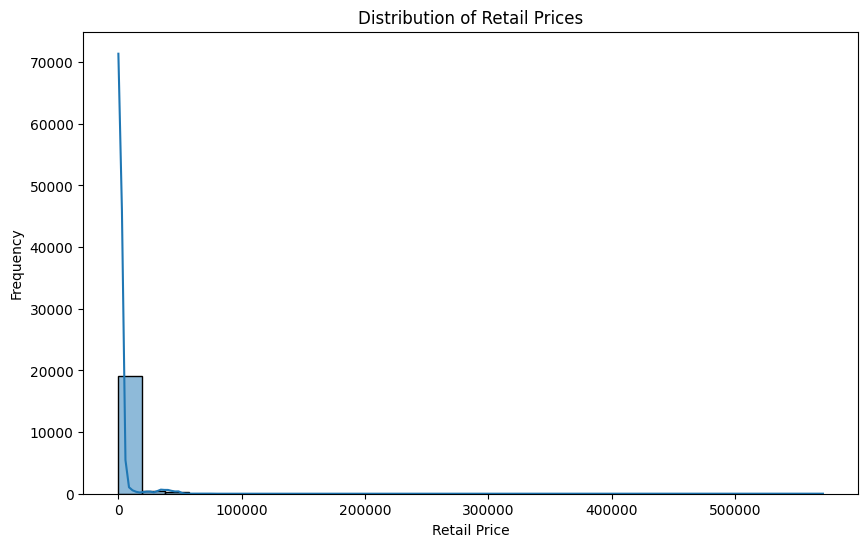

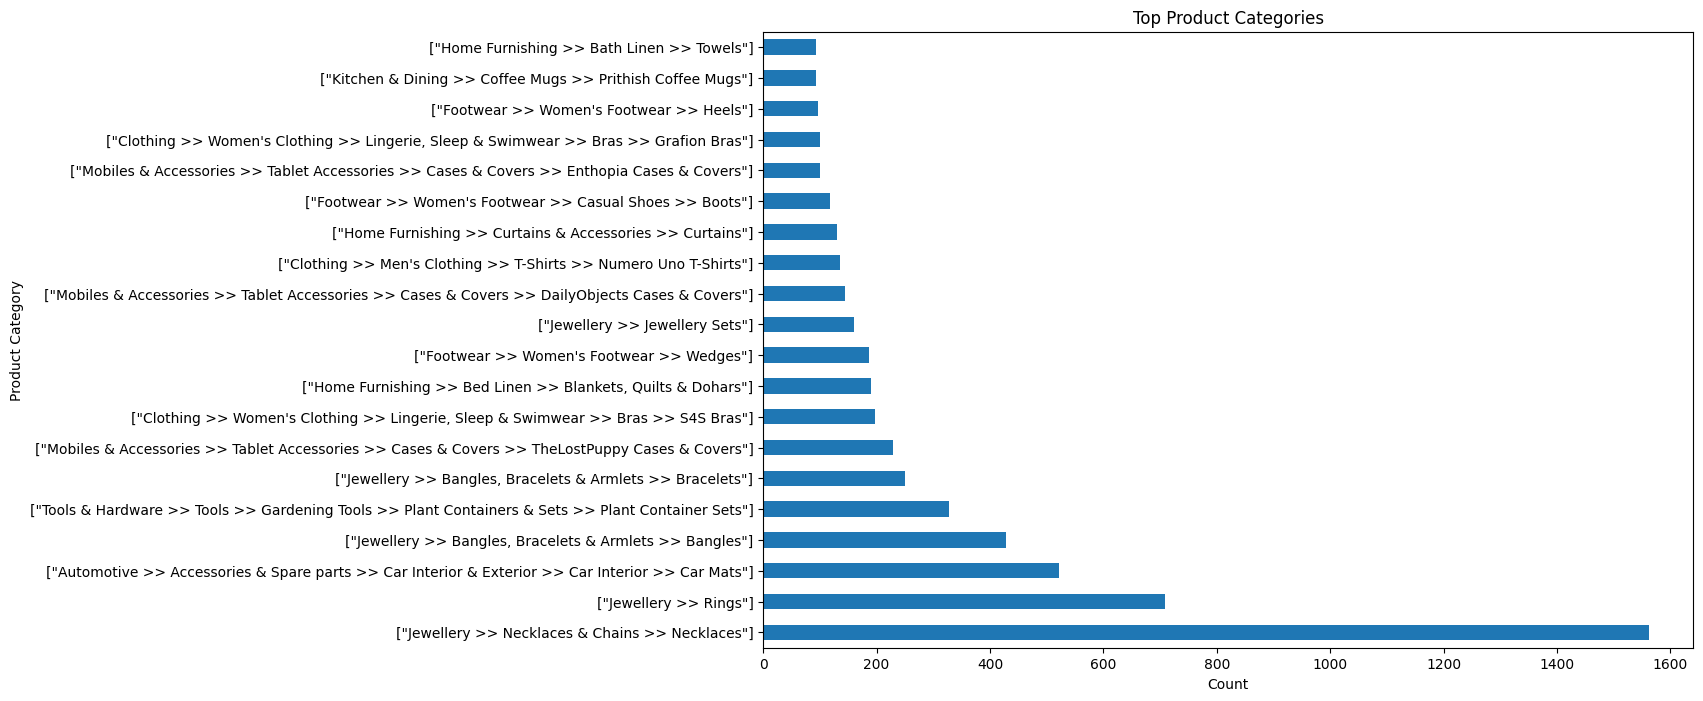

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['retail_price'], bins=30, kde=True)
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')
plt.show()
print('\n\n')

plt.figure(figsize=(12,8))
df_cleaned['product_category_tree'].value_counts().head(20).plot(kind = 'barh')
plt.title('Top Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

## **Retrieval System**

Preprocessing

In [8]:
import re
import nltk

# Download necessary NLTK data (skip wordnet if not lemmatizing)
nltk.download('punkt')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Join the words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the combined text
df_cleaned['combined_text'] = df_cleaned['product_name'].fillna('') + ' ' + \
                      df_cleaned['product_specifications'].fillna('') + ' ' + \
                      df_cleaned['description'].fillna('') + ' ' + \
                      df_cleaned['product_category_tree'].fillna('')

df_cleaned['combined_text'] = df_cleaned['combined_text'].apply(preprocess_text)

df_cleaned.head()  # Check the first few rows


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/tmp/ipykernel_96/1832413363.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_text'] = df_cleaned['product_name'].fillna('') + ' ' + \
/tmp/ipykernel_96/1832413363.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_text'] = df_cleaned['combined_text'].apply(preprocess_text)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,combined_text
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",alisha solid women s cycling shorts product_sp...
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",fabhomedecor fabric double sofa bed product_sp...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",aw bellies product_specification key ideal for...
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",alisha solid women s cycling shorts product_sp...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",sicons all purpose arnica dog shampoo product_...


Using retrieval model BM25

In [9]:
!pip install streamlit sentence-transformers rank_bm25

In [10]:
from rank_bm25 import BM25Okapi

tokenized_corpus = [doc.split() for doc in df_cleaned['combined_text']]
bm25 = BM25Okapi(tokenized_corpus)

def bm25_retrieve(query, top_k=10):
    processed_query = preprocess_text(query)
    tokenized_query = processed_query.split()
    scores = bm25.get_scores(tokenized_query)

    df_scores = pd.DataFrame({'score': scores, 'product_name': df_cleaned['product_name'],
                              'product_category_tree': df_cleaned['product_category_tree']})
    top_results = df_scores.sort_values(by='score', ascending=False).head(top_k)
    return top_results

Sentence BERT Model

In [11]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2') 

def sbert_retrieve(query, top_k=10):
    query_embedding = model.encode(query, convert_to_tensor=True) #converting the query into word embeddings
    corpus_embeddings = model.encode(df_cleaned['combined_text'].tolist(), convert_to_tensor=True) #embedding each term in 'combined_text'

    #calculating cosine similarities
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = pd.DataFrame({
        'score': cos_scores.cpu().detach().numpy(),
        'product_name': df_cleaned['product_name'],
        'product_category_tree': df_cleaned['product_category_tree']
    })

    top_results = top_results.sort_values(by='score', ascending=False).head(top_k)
    return top_results

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-08-09 06:25:34.527197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 06:25:34.527256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 06:25:34.528769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Computing Results for both the models

In [24]:
# Example query using BM25
bm25_results = bm25_retrieve("Alisha Shorts")
print("BM25 Results:")
print(bm25_results)

# Example query using SBERT
sbert_results = sbert_retrieve("Alisha Shorts")
print("SBERT Results:")
print(sbert_results)


BM25 Results:
           score                                       product_name  \
3      25.745915                Alisha Solid Women's Cycling Shorts   
15     25.722912                Alisha Solid Women's Cycling Shorts   
13     25.722912                Alisha Solid Women's Cycling Shorts   
0      25.722912                Alisha Solid Women's Cycling Shorts   
6      25.699954                Alisha Solid Women's Cycling Shorts   
9      25.699954                Alisha Solid Women's Cycling Shorts   
10422  10.240545                 Broche Printed Boy's Sports Shorts   
967    10.121007  Mynte Solid Women's Cycling Shorts, Gym Shorts...   
965    10.121007  Mynte Solid Women's Cycling Shorts, Gym Shorts...   
963    10.121007  Mynte Solid Women's Cycling Shorts, Gym Shorts...   

                                   product_category_tree  
3      ["Clothing >> Women's Clothing >> Lingerie, Sl...  
15     ["Clothing >> Women's Clothing >> Lingerie, Sl...  
13     ["Clothing >> Women'

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/623 [00:00<?, ?it/s]

SBERT Results:
          score                                     product_name  \
13     0.608075              Alisha Solid Women's Cycling Shorts   
15     0.605690              Alisha Solid Women's Cycling Shorts   
0      0.598269              Alisha Solid Women's Cycling Shorts   
3      0.597688              Alisha Solid Women's Cycling Shorts   
9      0.597549              Alisha Solid Women's Cycling Shorts   
6      0.587012              Alisha Solid Women's Cycling Shorts   
834    0.517165      Alibi Casual Short Sleeve Solid Women's Top   
808    0.504952        Alibi Casual Sleeveless Solid Women's Top   
15134  0.497913                  UFO Printed Girl's Basic Shorts   
8019   0.496960  Amirich Printed Women's Multicolor Basic Shorts   

                                   product_category_tree  
13     ["Clothing >> Women's Clothing >> Lingerie, Sl...  
15     ["Clothing >> Women's Clothing >> Lingerie, Sl...  
0      ["Clothing >> Women's Clothing >> Lingerie, Sl...  


Evaluation Metrics

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_retrieval_system(retrieve_func, queries, true_labels, top_k=10):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for query, true_label in zip(queries, true_labels):
        retrieved_items = retrieve_func(query, top_k)
        retrieved_labels = retrieved_items['product_name'].values

        # Convert true_label to a binary array indicating relevance
        relevant_retrieved = [1 if label in true_label else 0 for label in retrieved_labels]

        # Adjust the length of the true labels array to match retrieved items
        true_relevance = [1 if i < len(true_label) else 0 for i in range(top_k)]

        precision = precision_score(relevant_retrieved, true_relevance, average='macro')
        recall = recall_score(relevant_retrieved, true_relevance, average='macro')
        f1 = f1_score(relevant_retrieved, true_relevance, average='macro')

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)

In [22]:
#test queries to run
sample_queries = [
    "Alisha Shorts",
    "Diamond Ring",
    "Laptop"
]
#expected labels to appear
true_labels = [
    ["Alisha Solid Women's Cycling Shorts"],
    ["Avsar Sachi Gold Diamond 18 K Ring", "Karatcraft Dulce Gold Diamond 18 K Ring", "His & Her Gold Diamond 18K Yellow Gold 18 K Ring", "Karatcraft Twinoh Gold Diamond 18 K Ring", "Karatcraft Wadell Gold Diamond 18 K Ring", "American Diamond Alloy Jewel Set" , "Karatcraft Solitana Gold Diamond 18 K Ring"],
    ["Lenovo", "HP", "Asus", "Dell"]
]

precision_bm25, recall_bm25, f1_bm25 = evaluate_retrieval_system(bm25_retrieve, sample_queries, true_labels)
precision_sbert, recall_sbert, f1_sbert = evaluate_retrieval_system(sbert_retrieve, sample_queries, true_labels)

print("BM25")
print("Precision:", precision_bm25)
print("Recall:", recall_bm25)
print("F1 Score:", f1_bm25)

print("SBERT")
print("Precision:", precision_sbert)
print("Recall:", recall_sbert)
print("F1 Score:", f1_sbert)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/623 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/623 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/623 [00:00<?, ?it/s]

BM25
Precision: 0.5582010582010581
Recall: 0.44722222222222224
F1 Score: 0.42536630036630035
SBERT
Precision: 0.5661375661375662
Recall: 0.4531746031746032
F1 Score: 0.40851648351648345


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
!npm install localtunnel

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


m##################] \ reify:axios: http fetch GET 200 https://registry.npmjs.o/regis
added 22 packages in 1s

3 packages are looking for funding
  run `npm fund` for details
npm notice 
npm notice New minor version of npm available! 10.1.0 -> 10.8.2
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.8.2
npm notice Run npm install -g npm@10.8.2 to update!
npm notice 


In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import nltk
import numpy as np

df = pd.read_csv('/kaggle/input/flipkart-dataset/flipkart_com-ecommerce_sample.csv')
df_cleaned = df.dropna(subset=['discounted_price', 'retail_price', 'product_specifications', 'description'])

import re

import re
import nltk

# Download necessary NLTK data (skip wordnet if not lemmatizing)
nltk.download('punkt')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Join the words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the combined text
df_cleaned['combined_text'] = df_cleaned['product_name'].fillna('') + ' ' + \
                      df_cleaned['product_specifications'].fillna('') + ' ' + \
                      df_cleaned['description'].fillna('') + ' ' + \
                      df_cleaned['product_category_tree'].fillna('')

df_cleaned['combined_text'] = df_cleaned['combined_text'].apply(preprocess_text)

df_cleaned.head()  # Check the first few rows

from rank_bm25 import BM25Okapi

tokenized_corpus = [doc.split() for doc in df_cleaned['combined_text']]
bm25 = BM25Okapi(tokenized_corpus)

def bm25_retrieve(query, top_k=10):
    processed_query = preprocess_text(query)
    tokenized_query = processed_query.split()
    scores = bm25.get_scores(tokenized_query)

    df_scores = pd.DataFrame({'score': scores, 'product_name': df_cleaned['product_name'],
                              'product_category_tree': df_cleaned['product_category_tree']})
    top_results = df_scores.sort_values(by='score', ascending=False).head(top_k)
    return top_results


def search(query):
    # BM25 search
    bm25_results = bm25_retrieve(query)
    return bm25_results



st.title("Search Retrieval Demo")

# User input for search query
query = st.text_input("Enter your search query:")

# Button to trigger the search
if st.button("Search"):
    if query:
        results = search(query)
        
        st.write("Top search results:")
        st.dataframe(results['product_name'])
    else:
        st.write("Please enter a query to search.")


Writing app.py


In [19]:
!curl ipv4.icanhazip.com

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


34.83.78.4


In [ ]:
!streamlit run app.py &>./logs.txt & npx localtunnel --port 8501

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


your url is: https://large-gifts-eat.loca.lt
